In [2]:
!pip install mgwr

In [3]:
!pip install folium
!pip install geopy
!pip install geopandas
!pip install libpysal
!pip install spreg

In [4]:
# import relevant packages / modules
import pandas as pd
import numpy
import statistics
import folium
import geopy
from folium.plugins import HeatMap
import branca.colormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import random
import geopandas as gpd

service = geopy.Nominatim(user_agent = "myGeocoder")

In [5]:
df=pd.read_csv("./Crime_Data_from_2020_to_Present.csv")
df

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230   
1       190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   
2       191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730   
3       191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415   
4       200100501  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM        30   
...           ...                     ...                     ...       ...   
852945  231606525  03/22/2023 12:00:00 AM  03/22/2023 12:00:00 AM      1000   
852946  231210064  04/12/2023 12:00:00 AM  04/12/2023 12:00:00 AM      1630   
852947  230115220  07/02/2023 12:00:00 AM  07/01/2023 12:00:00 AM         1   
852948  230906458  03/05/2023 12:00:00 AM  03/05/2023 12:00:00 AM       900   
852949  230319786  11/10/2023 12:00:00 AM  11/09/2023 12:00:00 AM      2300   

        AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0          3    Southwest          377         2     624   
1          1      Central          163         2     624   
2         15  N Hollywood         1543         2     745   
3         19      Mission         1998         2     740   
4          1      Central          163         1     121   
...      ...          ...          ...       ...     ...   
852945    16     Foothill         1602         1     230   
852946    12  77th Street         1239         1     230   
852947     1      Central          154         1     352   
852948     9     Van Nuys          914         2     745   
852949     3    Southwest          395         1     331   

                                              Crm Cd Desc  ... Status  \
0                                BATTERY - SIMPLE ASSAULT  ...     AO   
1                                BATTERY - SIMPLE ASSAULT  ...     IC   
2                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
3       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
4                                          RAPE, FORCIBLE  ...     IC   
...                                                   ...  ...    ...   
852945     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     IC   
852946     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     IC   
852947                                         PICKPOCKET  ...     IC   
852948           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
852949  THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...  ...     IC   

        Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0       Adult Other    624.0      NaN       NaN      NaN   
1       Invest Cont    624.0      NaN       NaN      NaN   
2       Invest Cont    745.0    998.0       NaN      NaN   
3       Invest Cont    740.0      NaN       NaN      NaN   
4       Invest Cont    121.0    998.0       NaN      NaN   
...             ...      ...      ...       ...      ...   
852945  Invest Cont    230.0      NaN       NaN      NaN   
852946  Invest Cont    230.0      NaN       NaN      NaN   
852947  Invest Cont    352.0      NaN       NaN      NaN   
852948  Invest Cont    745.0      NaN       NaN      NaN   
852949  Invest Cont    331.0      NaN       NaN      NaN   

                                        LOCATION Cross Street      LAT  \
0        1100 W  39TH                         PL          NaN  34.0141   
1         700 S  HILL                         ST          NaN  34.0459   
2        5400    CORTEEN                      PL          NaN  34.1685   
3       14400    TITUS                        ST          NaN  34.2198   
4                                700 S  BROADWAY          NaN  34.0452   
...                                          ...          ...      ...   
852945  12800    FILMORE                      ST          NaN  34.2790   
852946   6100 S  VERMONT                      AV          NaN  33.9841   
852947    500 S  MAIN                         ST          NaN  34.0467   
8529

In [6]:
df.loc[:,"DR_NO":'Mocodes']

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230   
1       190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   
2       191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730   
3       191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415   
4       200100501  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM        30   
...           ...                     ...                     ...       ...   
852945  231606525  03/22/2023 12:00:00 AM  03/22/2023 12:00:00 AM      1000   
852946  231210064  04/12/2023 12:00:00 AM  04/12/2023 12:00:00 AM      1630   
852947  230115220  07/02/2023 12:00:00 AM  07/01/2023 12:00:00 AM         1   
852948  230906458  03/05/2023 12:00:00 AM  03/05/2023 12:00:00 AM       900   
852949  230319786  11/10/2023 12:00:00 AM  11/09/2023 12:00:00 AM      2300   

        AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0          3    Southwest          377         2     624   
1          1      Central          163         2     624   
2         15  N Hollywood         1543         2     745   
3         19      Mission         1998         2     740   
4          1      Central          163         1     121   
...      ...          ...          ...       ...     ...   
852945    16     Foothill         1602         1     230   
852946    12  77th Street         1239         1     230   
852947     1      Central          154         1     352   
852948     9     Van Nuys          914         2     745   
852949     3    Southwest          395         1     331   

                                              Crm Cd Desc  \
0                                BATTERY - SIMPLE ASSAULT   
1                                BATTERY - SIMPLE ASSAULT   
2                VANDALISM - MISDEAMEANOR ($399 OR UNDER)   
3       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   
4                                          RAPE, FORCIBLE   
...                                                   ...   
852945     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
852946     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
852947                                         PICKPOCKET   
852948           VANDALISM - MISDEAMEANOR ($399 OR UNDER)   
852949  THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...   

                         Mocodes  
0                      0444 0913  
1                 0416 1822 1414  
2                      0329 1402  
3                           0329  
4            0413 1822 1262 1415  
...                          ...  
852945            0416 0411 1822  
852946       0601 0445 0416 0359  
852947                 1822 0344  
852948                 0329 1822  
852949  1822 1606 0344 0385 1300  

[852950 rows x 11 columns]

In [7]:
df.shape

(852950, 28)

In [8]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(852950, 28)

In [10]:
null_value_percentages=(df.isna().sum()/df.shape[0])*100
null_value_percentages

DR_NO              0.000000
Date Rptd          0.000000
DATE OCC           0.000000
TIME OCC           0.000000
AREA               0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
Part 1-2           0.000000
Crm Cd             0.000000
Crm Cd Desc        0.000000
Mocodes           13.870801
Vict Age           0.000000
Vict Sex          13.201946
Vict Descent      13.202884
Premis Cd          0.001172
Premis Desc        0.060730
Weapon Used Cd    65.209215
Weapon Desc       65.209215
Status             0.000000
Status Desc        0.000000
Crm Cd 1           0.001290
Crm Cd 2          92.670028
Crm Cd 3          99.752272
Crm Cd 4          99.992731
LOCATION           0.000000
Cross Street      84.095082
LAT                0.000000
LON                0.000000
dtype: float64

In [11]:
df["Vict Sex"].unique()

array(['F', 'M', 'X', nan, 'H', '-'], dtype=object)

In [12]:
columns_with_null_values = null_value_percentages[null_value_percentages>0]
columns_with_null_values

Mocodes           13.870801
Vict Sex          13.201946
Vict Descent      13.202884
Premis Cd          0.001172
Premis Desc        0.060730
Weapon Used Cd    65.209215
Weapon Desc       65.209215
Crm Cd 1           0.001290
Crm Cd 2          92.670028
Crm Cd 3          99.752272
Crm Cd 4          99.992731
Cross Street      84.095082
dtype: float64

In [13]:
df["Vict Descent"].unique()

array(['B', 'H', 'W', 'X', 'A', 'O', nan, 'C', 'F', 'K', 'I', 'V', 'D',
       'J', 'Z', 'U', 'P', 'G', 'S', 'L', '-'], dtype=object)

In [14]:
columns_to_drop=null_value_percentages[null_value_percentages>40]
columns_to_drop=columns_to_drop.keys()
print(columns_to_drop)
df.drop(['Mocodes'], axis=1,inplace=True)
df

Index(['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4',
       'Cross Street'],
      dtype='object')


DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230   
1       190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   
2       191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730   
3       191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415   
4       200100501  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM        30   
...           ...                     ...                     ...       ...   
852945  231606525  03/22/2023 12:00:00 AM  03/22/2023 12:00:00 AM      1000   
852946  231210064  04/12/2023 12:00:00 AM  04/12/2023 12:00:00 AM      1630   
852947  230115220  07/02/2023 12:00:00 AM  07/01/2023 12:00:00 AM         1   
852948  230906458  03/05/2023 12:00:00 AM  03/05/2023 12:00:00 AM       900   
852949  230319786  11/10/2023 12:00:00 AM  11/09/2023 12:00:00 AM      2300   

        AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0          3    Southwest          377         2     624   
1          1      Central          163         2     624   
2         15  N Hollywood         1543         2     745   
3         19      Mission         1998         2     740   
4          1      Central          163         1     121   
...      ...          ...          ...       ...     ...   
852945    16     Foothill         1602         1     230   
852946    12  77th Street         1239         1     230   
852947     1      Central          154         1     352   
852948     9     Van Nuys          914         2     745   
852949     3    Southwest          395         1     331   

                                              Crm Cd Desc  ...  Status  \
0                                BATTERY - SIMPLE ASSAULT  ...      AO   
1                                BATTERY - SIMPLE ASSAULT  ...      IC   
2                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...      IC   
3       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...      IC   
4                                          RAPE, FORCIBLE  ...      IC   
...                                                   ...  ...     ...   
852945     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...      IC   
852946     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...      IC   
852947                                         PICKPOCKET  ...      IC   
852948           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...      IC   
852949  THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...  ...      IC   

        Status Desc Crm Cd 1  Crm Cd 2 Crm Cd 3  Crm Cd 4  \
0       Adult Other    624.0       NaN      NaN       NaN   
1       Invest Cont    624.0       NaN      NaN       NaN   
2       Invest Cont    745.0     998.0      NaN       NaN   
3       Invest Cont    740.0       NaN      NaN       NaN   
4       Invest Cont    121.0     998.0      NaN       NaN   
...             ...      ...       ...      ...       ...   
852945  Invest Cont    230.0       NaN      NaN       NaN   
852946  Invest Cont    230.0       NaN      NaN       NaN   
852947  Invest Cont    352.0       NaN      NaN       NaN   
852948  Invest Cont    745.0       NaN      NaN       NaN   
852949  Invest Cont    331.0       NaN      NaN       NaN   

                                        LOCATION Cross Street      LAT  \
0        1100 W  39TH                         PL          NaN  34.0141   
1         700 S  HILL                         ST          NaN  34.0459   
2        5400    CORTEEN                      PL          NaN  34.1685   
3       14400    TITUS                        ST          NaN  34.2198   
4                                700 S  BROADWAY          NaN  34.0452   
...                                          ...          ...      ...   
852945  12800    FILMORE                      ST          NaN  34.2790   
852946   6100 S  VERMONT                      AV          NaN  33.9841   
852947    500 S  MAIN                         ST      

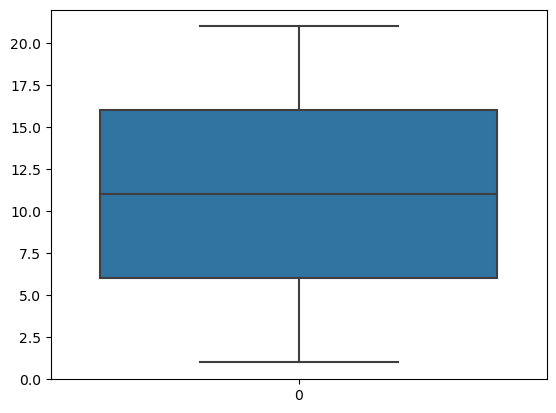

<Figure size 1000x1000 with 0 Axes>

In [15]:
sns.boxplot(df["AREA"])
plt.figure(figsize=(10, 10))
plt.show()

In [16]:
df['Crm Cd Desc'].unique()

array(['BATTERY - SIMPLE ASSAULT',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'ROBBERY',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'BURGLARY',
       'THEFT, PERSON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN',
       'BATTERY POLICE (SIMPLE)', 'THEFT PLAIN - PETTY ($950 & UNDER)',
       'VEHICLE - STOLEN', 'TRESPASSING', 'BRANDISH WEAPON',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'THEFT FROM MOTOR VEHICLE - ATTEMPT',
       'THROWING OBJECT AT MOVING VEHICLE', 'THEFT OF IDENTITY',
       'BUNCO, GRAND THEFT', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'ATTEMPTED R

In [17]:
p=df['DATE OCC'].unique()
print(len(p))
p

1434


array(['01/08/2020 12:00:00 AM', '01/01/2020 12:00:00 AM',
       '01/02/2020 12:00:00 AM', ..., '07/16/2023 12:00:00 AM',
       '09/21/2023 12:00:00 AM', '03/16/2023 12:00:00 AM'], dtype=object)

In [18]:
df = df[(df['LAT'] != 0) & (df['LON'] != 0)]

In [19]:
final_df = df.copy

In [20]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
df['Day_of_Year'] = df['DATE OCC'].dt.dayofyear
df['Season'] = df['Month'].apply(get_season)

C:\Users\Kalyan Ram\AppData\Local\Temp\ipykernel_608\1119867333.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
C:\Users\Kalyan Ram\AppData\Local\Temp\ipykernel_608\1119867333.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['DATE OCC'].dt.year
C:\Users\Kalyan Ram\AppData\Local\Temp\ipykernel_608\1119867333.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

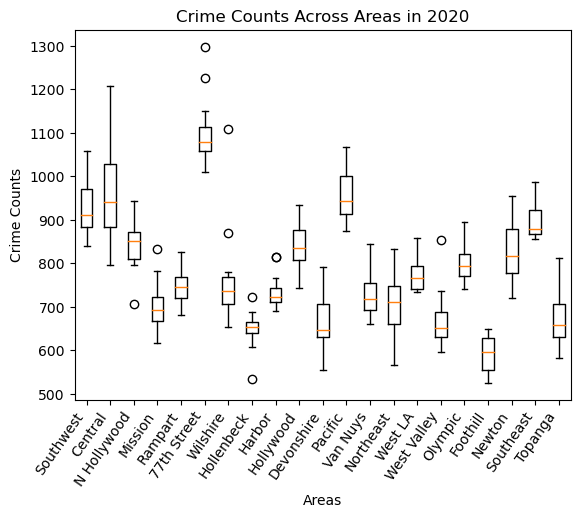

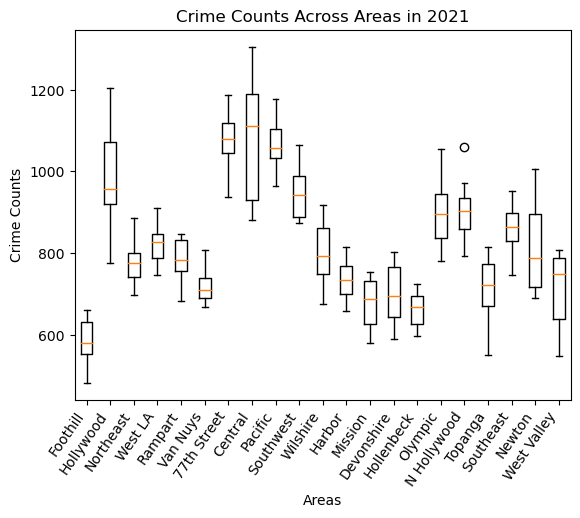

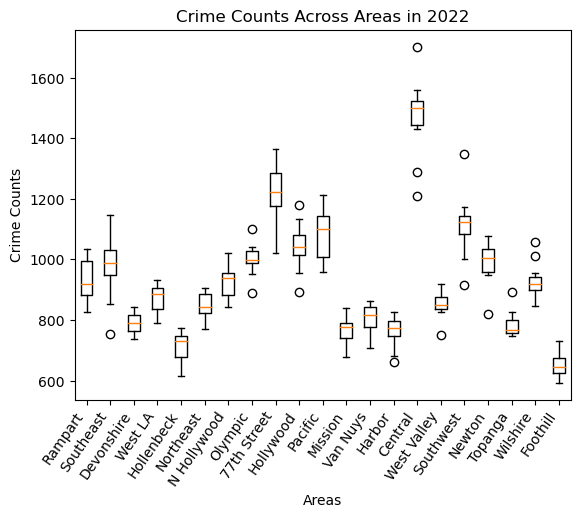

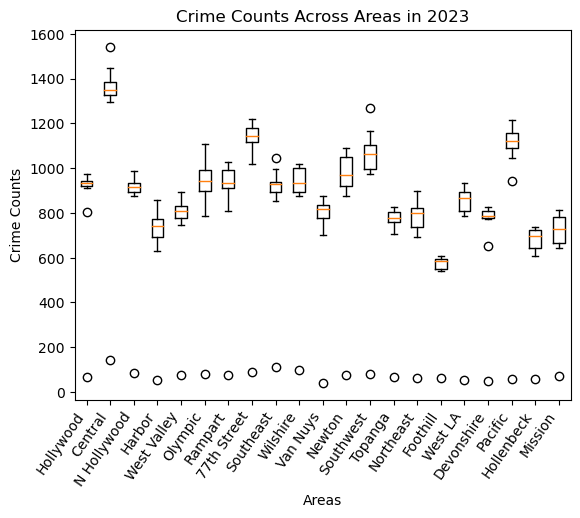

In [21]:
for year in [2020,2021,2022,2023]:    
    statistical_df=df[df["Year"] == year]
    areas = statistical_df["AREA NAME"].unique()
    d = {}
    for area in areas:
        d[area] = {}
        for month in range(1,13):
            d[area][month] = len(statistical_df[(statistical_df["AREA NAME"] == area) & (statistical_df["Month"] == month)])
    
    data_to_plot = [list(d[area].values()) for area in d]
    plt.boxplot(data_to_plot, labels=list(d.keys()))
    plt.xlabel('Areas')
    plt.ylabel('Crime Counts')
    plt.title(f'Crime Counts Across Areas in {year}')
    plt.xticks(rotation=55, ha='right')  
    plt.show()


## Bar Chart with all Places

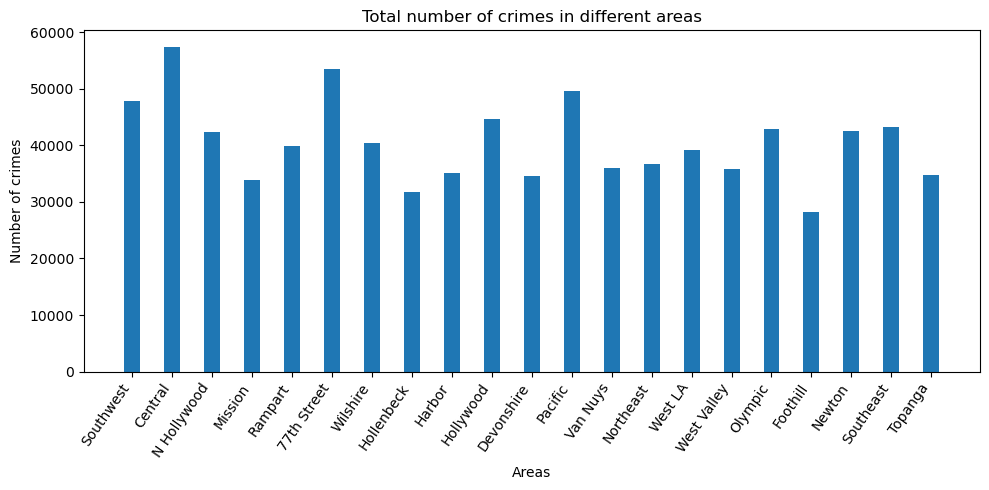

In [22]:
d = {}
for location in df["AREA NAME"].unique():
    d[location] = len(df[df["AREA NAME"] == location])

places = list(d.keys())
crime_counts = list(d.values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(places, crime_counts,width = 0.4)

plt.xlabel("Areas")
plt.ylabel("Number of crimes")
plt.title("Total number of crimes in different areas")

plt.xticks(rotation=55, ha='right')  
plt.tight_layout()  
plt.show()

## Count of crimes across days of the year

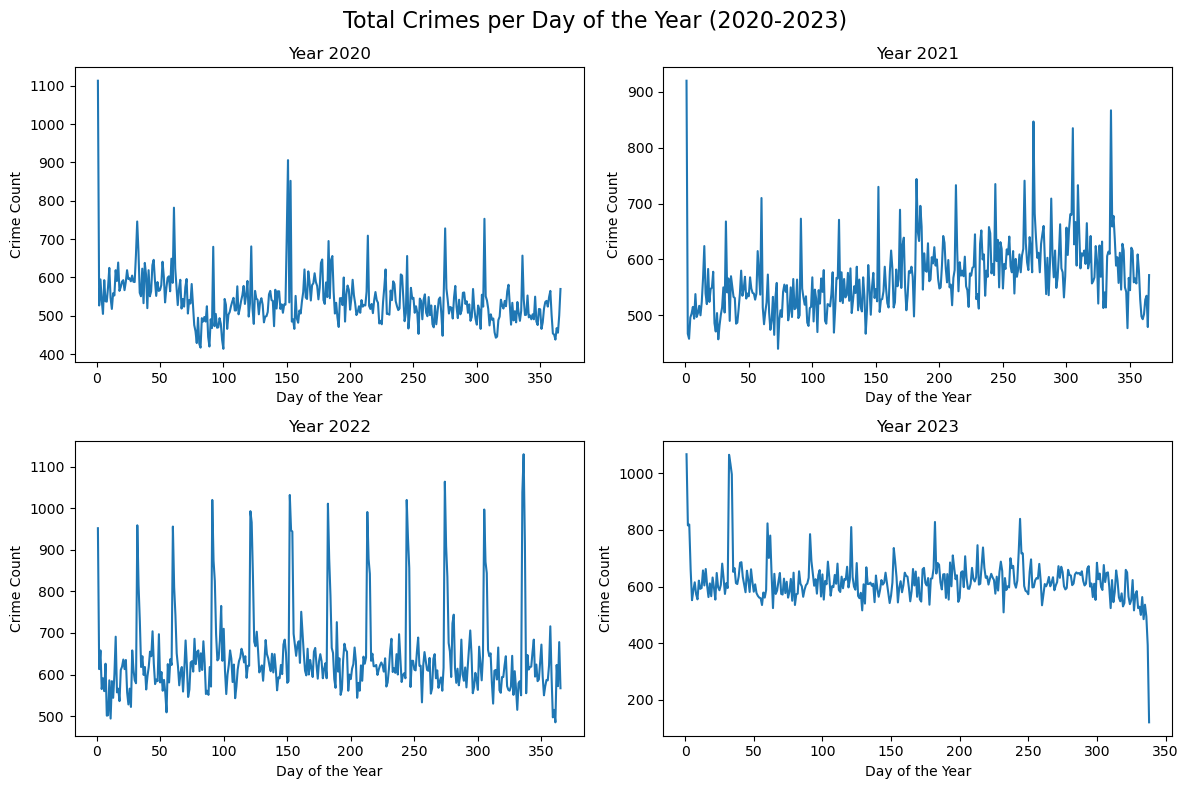

In [23]:
grouped = df.groupby(['Year', 'Day_of_Year']).size().reset_index(name='Crime_Count')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Total Crimes per Day of the Year (2020-2023)', fontsize=16)

years = sorted(df['Year'].unique())
for i, year in enumerate(years):
    subplot_row = i // 2 
    subplot_col = i % 2   
    data_year = grouped[grouped['Year'] == year]
    
    axs[subplot_row, subplot_col].plot(data_year['Day_of_Year'], data_year['Crime_Count'])
    axs[subplot_row, subplot_col].set_title(f'Year {year}')
    axs[subplot_row, subplot_col].set_xlabel('Day of the Year')
    axs[subplot_row, subplot_col].set_ylabel('Crime Count')

plt.tight_layout()
plt.show()


## Count of crimes across months of the year

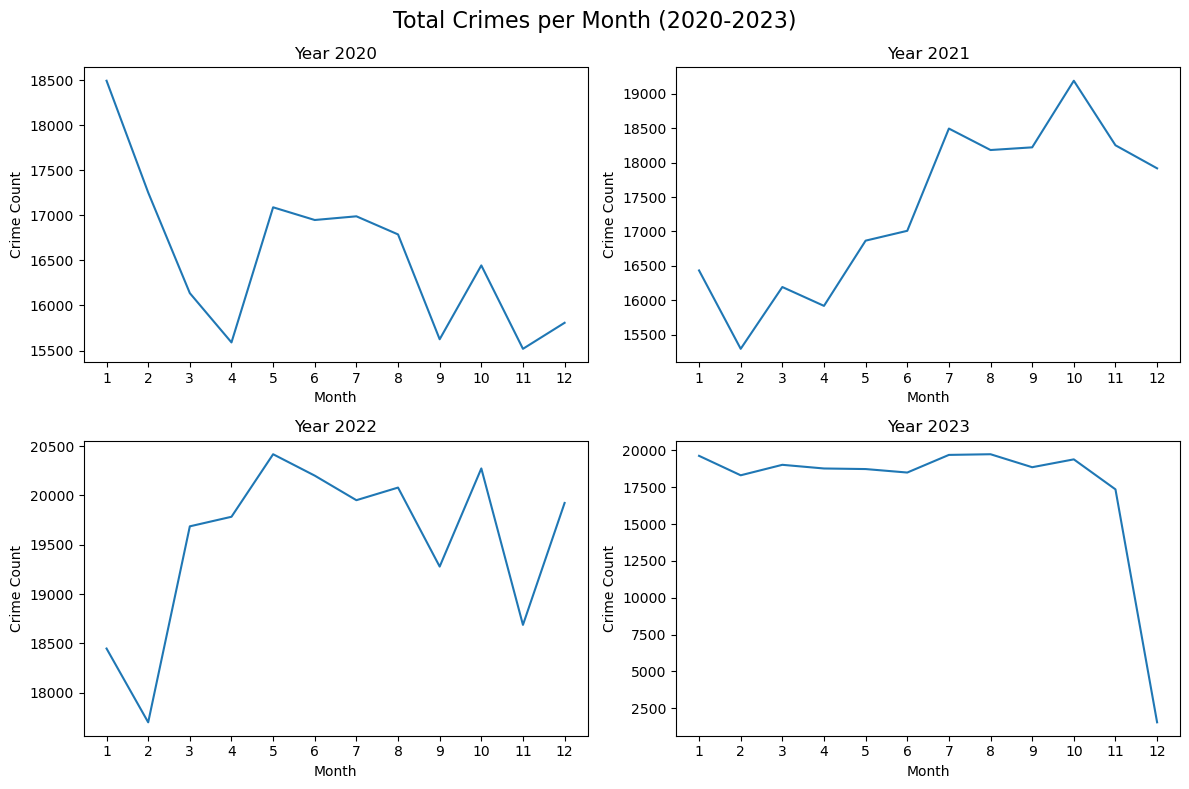

In [24]:
grouped = df.groupby(['Year', 'Month']).size().reset_index(name='Crime_Count')

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Total Crimes per Month (2020-2023)', fontsize=16)

years = sorted(df['Year'].unique())
for i, year in enumerate(years):
    subplot_row = i // 2  
    subplot_col = i % 2   

    data_year = grouped[grouped['Year'] == year]
    
    axs[subplot_row, subplot_col].plot(data_year['Month'], data_year['Crime_Count'])
    axs[subplot_row, subplot_col].set_title(f'Year {year}')
    axs[subplot_row, subplot_col].set_xlabel('Month')
    axs[subplot_row, subplot_col].set_ylabel('Crime Count')
    axs[subplot_row, subplot_col].set_xticks(range(1, 13))  # Show all months

plt.tight_layout()
plt.show()


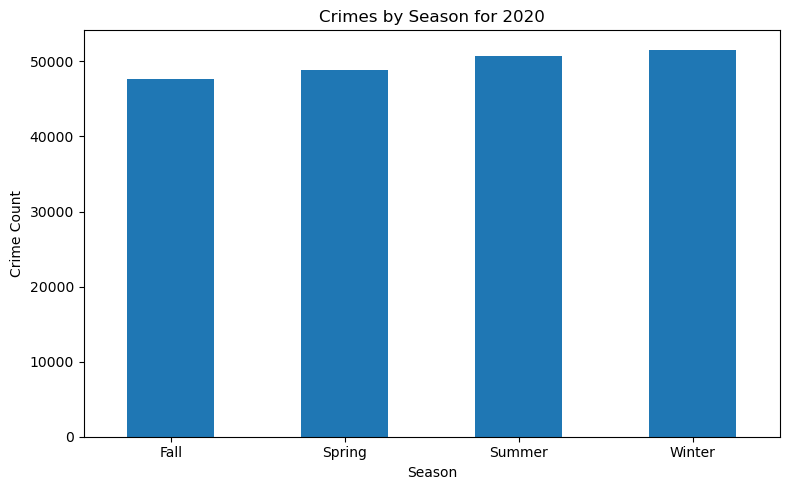

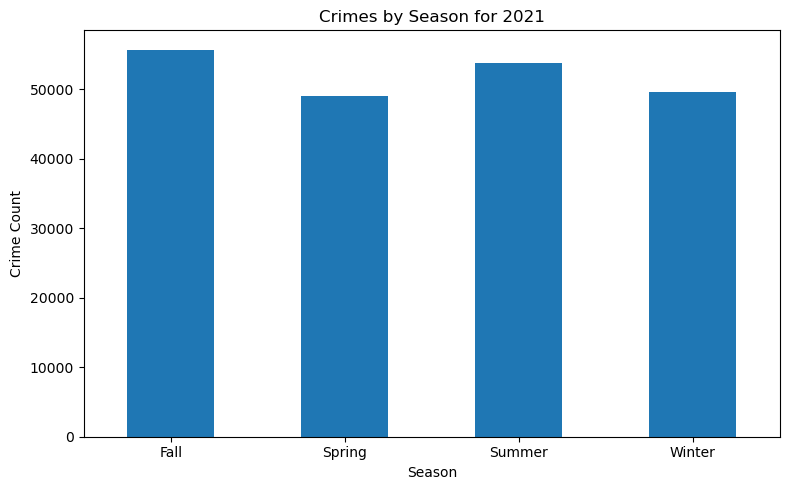

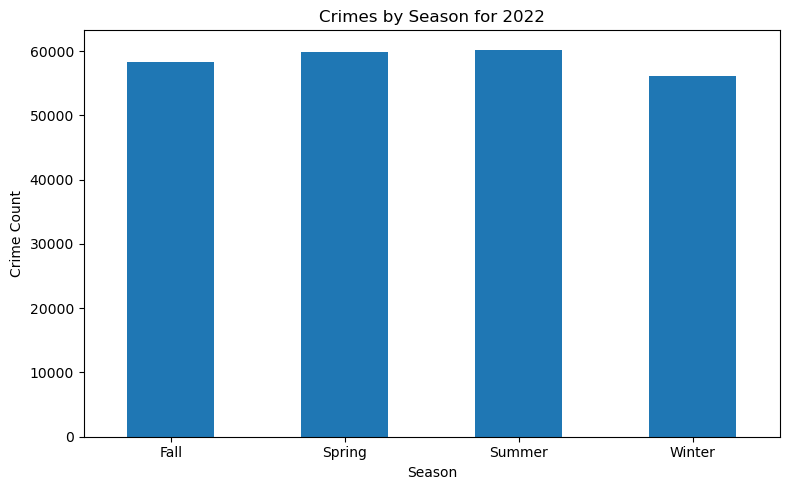

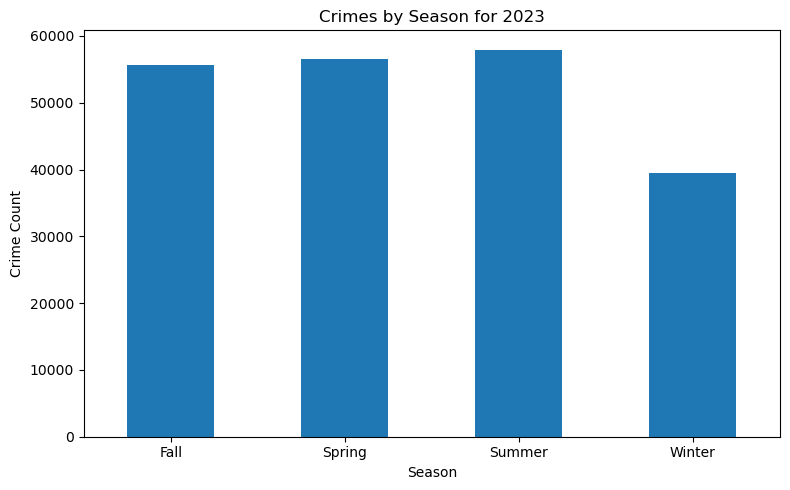

In [25]:
grouped = df.groupby(['Year', 'Season']).size().unstack().fillna(0)

years = sorted(df['Year'].unique())

for year in years:
    data_year = grouped.loc[year]
    plt.figure(figsize=(8, 5))
    data_year.plot(kind='bar')
    plt.title(f'Crimes by Season for {year}')
    plt.xlabel('Season')
    plt.ylabel('Crime Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


## Location Heatmap

In [26]:
def create_heat_map(area_name,month):
    if(area_name!="All"):
        filtered_df = df[df["AREA NAME"] == area_name]
    else:
        filtered_df = df
    
    if(month!="All"):
        filtered_df = filtered_df[filtered_df['Month'] == month]
    
    crime_map = folium.Map(location=[filtered_df['LAT'].mean(), filtered_df['LON'].mean()], zoom_start=12)
    heat_data = filtered_df[['LAT', 'LON']].values.tolist()

    normalized_heat_data = [[point[0], point[1], 1.0] for point in heat_data]  # Normalize intensity to 1.0

    HeatMap(normalized_heat_data, radius=15, max_zoom=18).add_to(crime_map)  # Set max_zoom to control color consistency

    crime_map.save(f'{area_name}-{month}.html')
    crime_map


# for i in range(1,13):
#     create_heat_map("77th Street",i)
create_heat_map("All", "All")

### Small Multiples

#### Crime trends between different areas across seasons

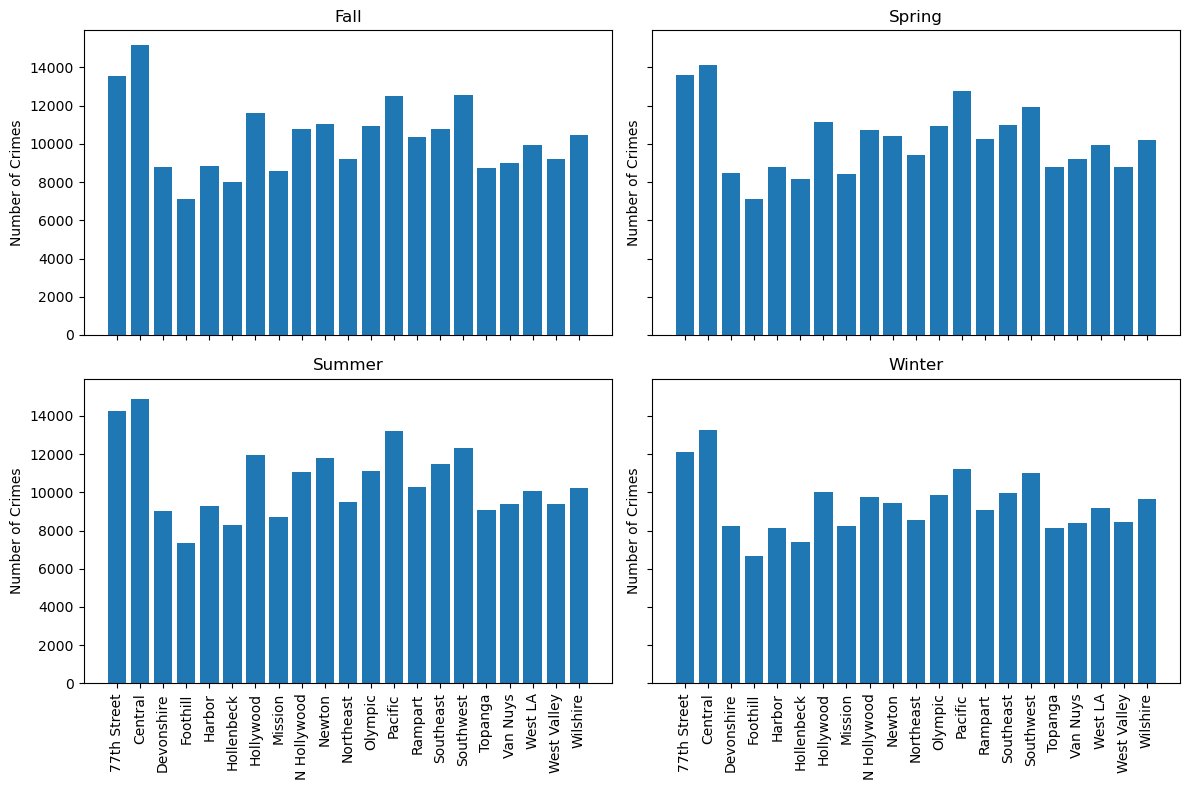

In [27]:
# Load the dataset
data = df

# # Assign season names
season_map = {1: 'Fall', 2: 'Spring', 3: 'Summer', 4: 'Winter'}

# Group data by season and area, count number of crimes
grouped = data.groupby(['Season', 'AREA NAME']).size().reset_index(name='Crime Count')

# Get unique area names for consistent x-axis across subplots
area_names = grouped['AREA NAME'].unique()

# Plotting small multiples for each season in a 2x2 grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True, sharey=True)

for i, season in enumerate(season_map.values()):
    ax = axs[i // 2, i % 2]  # Select subplot
    season_data = grouped[grouped['Season'] == season].set_index('AREA NAME').reindex(area_names)
    ax.bar(season_data.index, season_data['Crime Count'])
    ax.set_title(season)
    ax.set_ylabel('Number of Crimes')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Moving Average

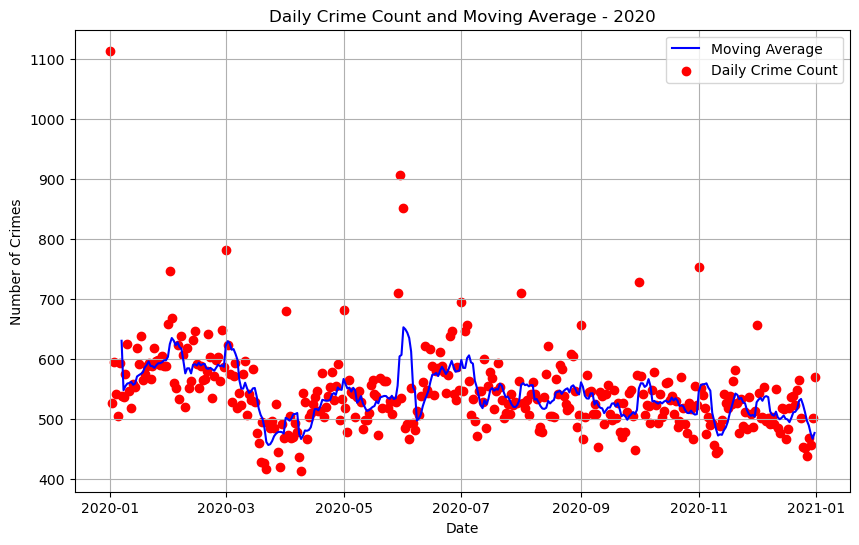

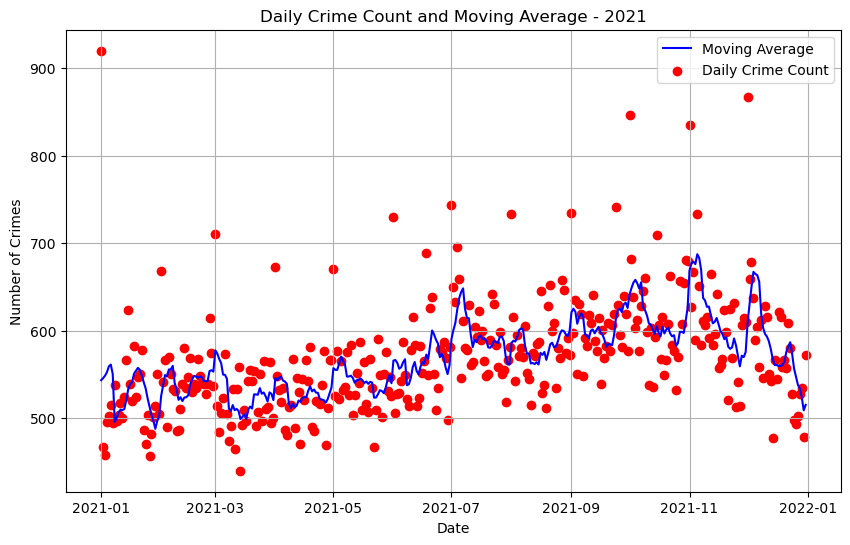

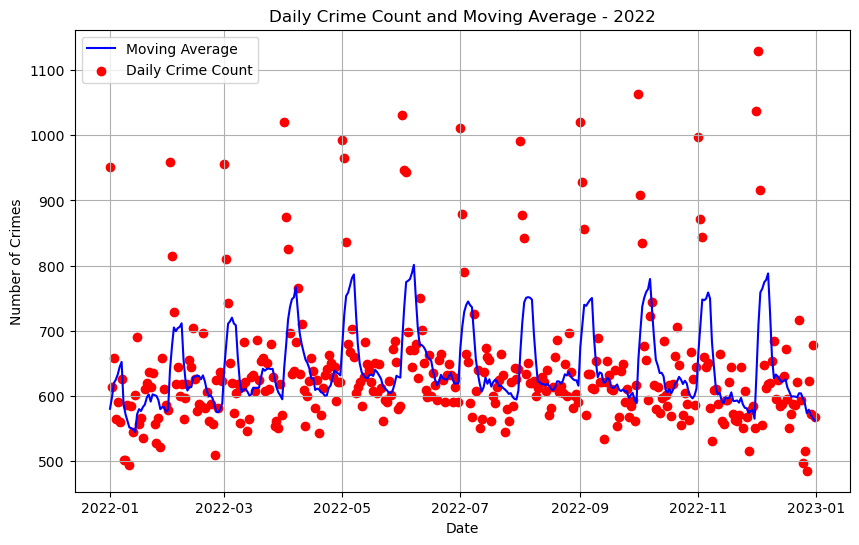

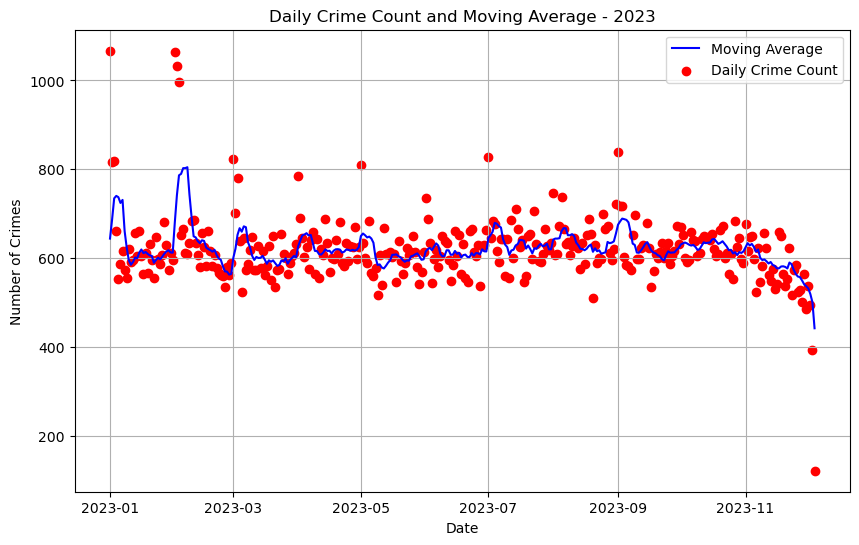

In [28]:
daily_crime_counts = df.groupby('DATE OCC')['DR_NO'].count().reset_index()
daily_crime_counts.columns = ['DATE OCC', 'Crime Count']

# Calculate the moving average for the daily crime counts
daily_crime_counts['Moving_Avg_Crime'] = daily_crime_counts['Crime Count'].rolling(window=7).mean()

# Extract year from the 'Date Rptd' column
daily_crime_counts['Year'] = daily_crime_counts['DATE OCC'].dt.year

# Create separate DataFrames for each year
yearly_dfs = [group for _, group in daily_crime_counts.groupby('Year')]

# Plotting line graphs for each year
for year_df in yearly_dfs:
    plt.figure(figsize=(10, 6))
    plt.plot(year_df['DATE OCC'], year_df['Moving_Avg_Crime'], label='Moving Average', color='blue')
    plt.scatter(year_df['DATE OCC'], year_df['Crime Count'], label='Daily Crime Count', color='red', marker='o')
    plt.title(f'Daily Crime Count and Moving Average - {year_df["Year"].iloc[0]}')
    plt.xlabel('Date')
    plt.ylabel('Number of Crimes')
    plt.legend()
    plt.grid(True)
    plt.show()


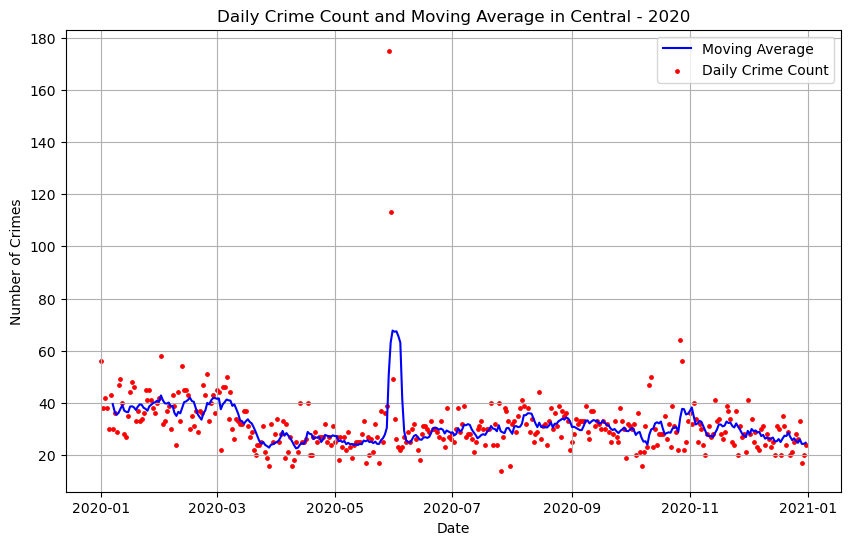

In [29]:
def filterByAreaName(df,areaname):
    # Group by 'Date Rptd' and count the number of crimes for each date
    df=df[df['AREA NAME']==areaname]
    daily_crime_counts = df.groupby('DATE OCC')['DR_NO'].count().reset_index()
    daily_crime_counts.columns = ['DATE OCC', 'Crime Count']

    # Calculate the moving average for the daily crime counts
    daily_crime_counts['Moving_Avg_Crime'] = daily_crime_counts['Crime Count'].rolling(window=7).mean()

    # Extract year from the 'Date Rptd' column
    daily_crime_counts['Year'] = daily_crime_counts['DATE OCC'].dt.year

    # Create separate DataFrames for each year
    yearly_dfs = [group for _, group in daily_crime_counts.groupby('Year')]

    # Plotting line graphs for each year
    # for year_df in yearly_dfs:
    year_df=yearly_dfs[0]
    plt.figure(figsize=(10, 6))
    plt.plot(year_df['DATE OCC'], year_df['Moving_Avg_Crime'], label='Moving Average', color='blue')
    plt.scatter(year_df['DATE OCC'], year_df['Crime Count'], label='Daily Crime Count', color='red', marker='o', s=6)
    plt.title(f'Daily Crime Count and Moving Average in {areaname} - {year_df["Year"].iloc[0]}')
    plt.xlabel('Date')
    plt.ylabel('Number of Crimes')
    plt.legend()
    plt.grid(True)
    # plt.show()

filterByAreaName(df,"Central")

Year 2020


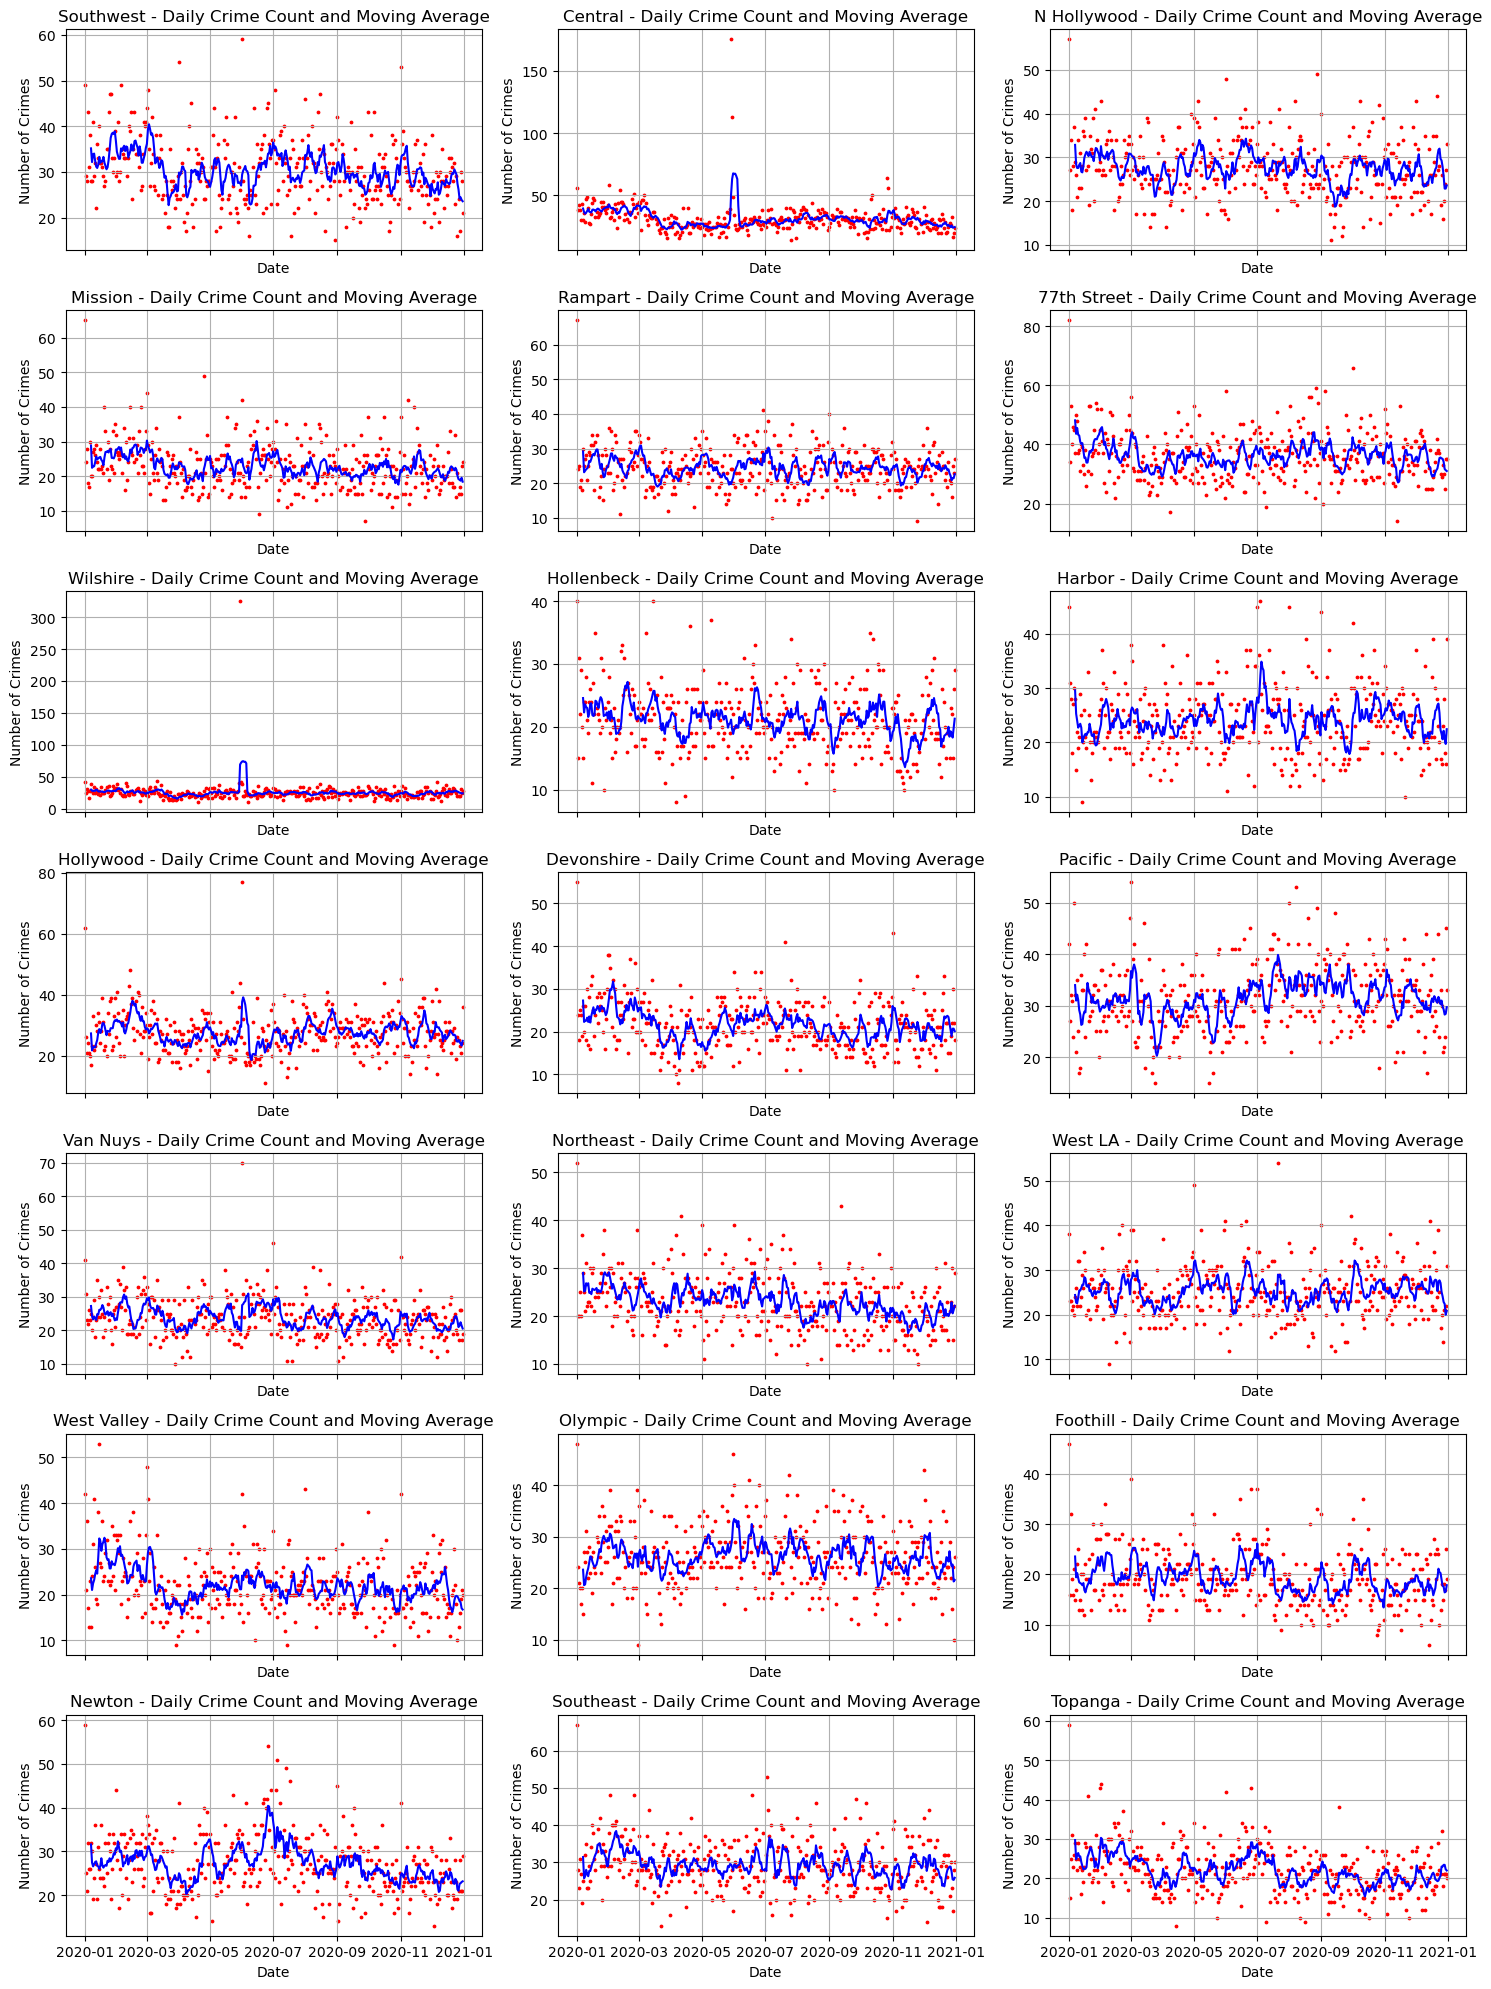

Year 2021


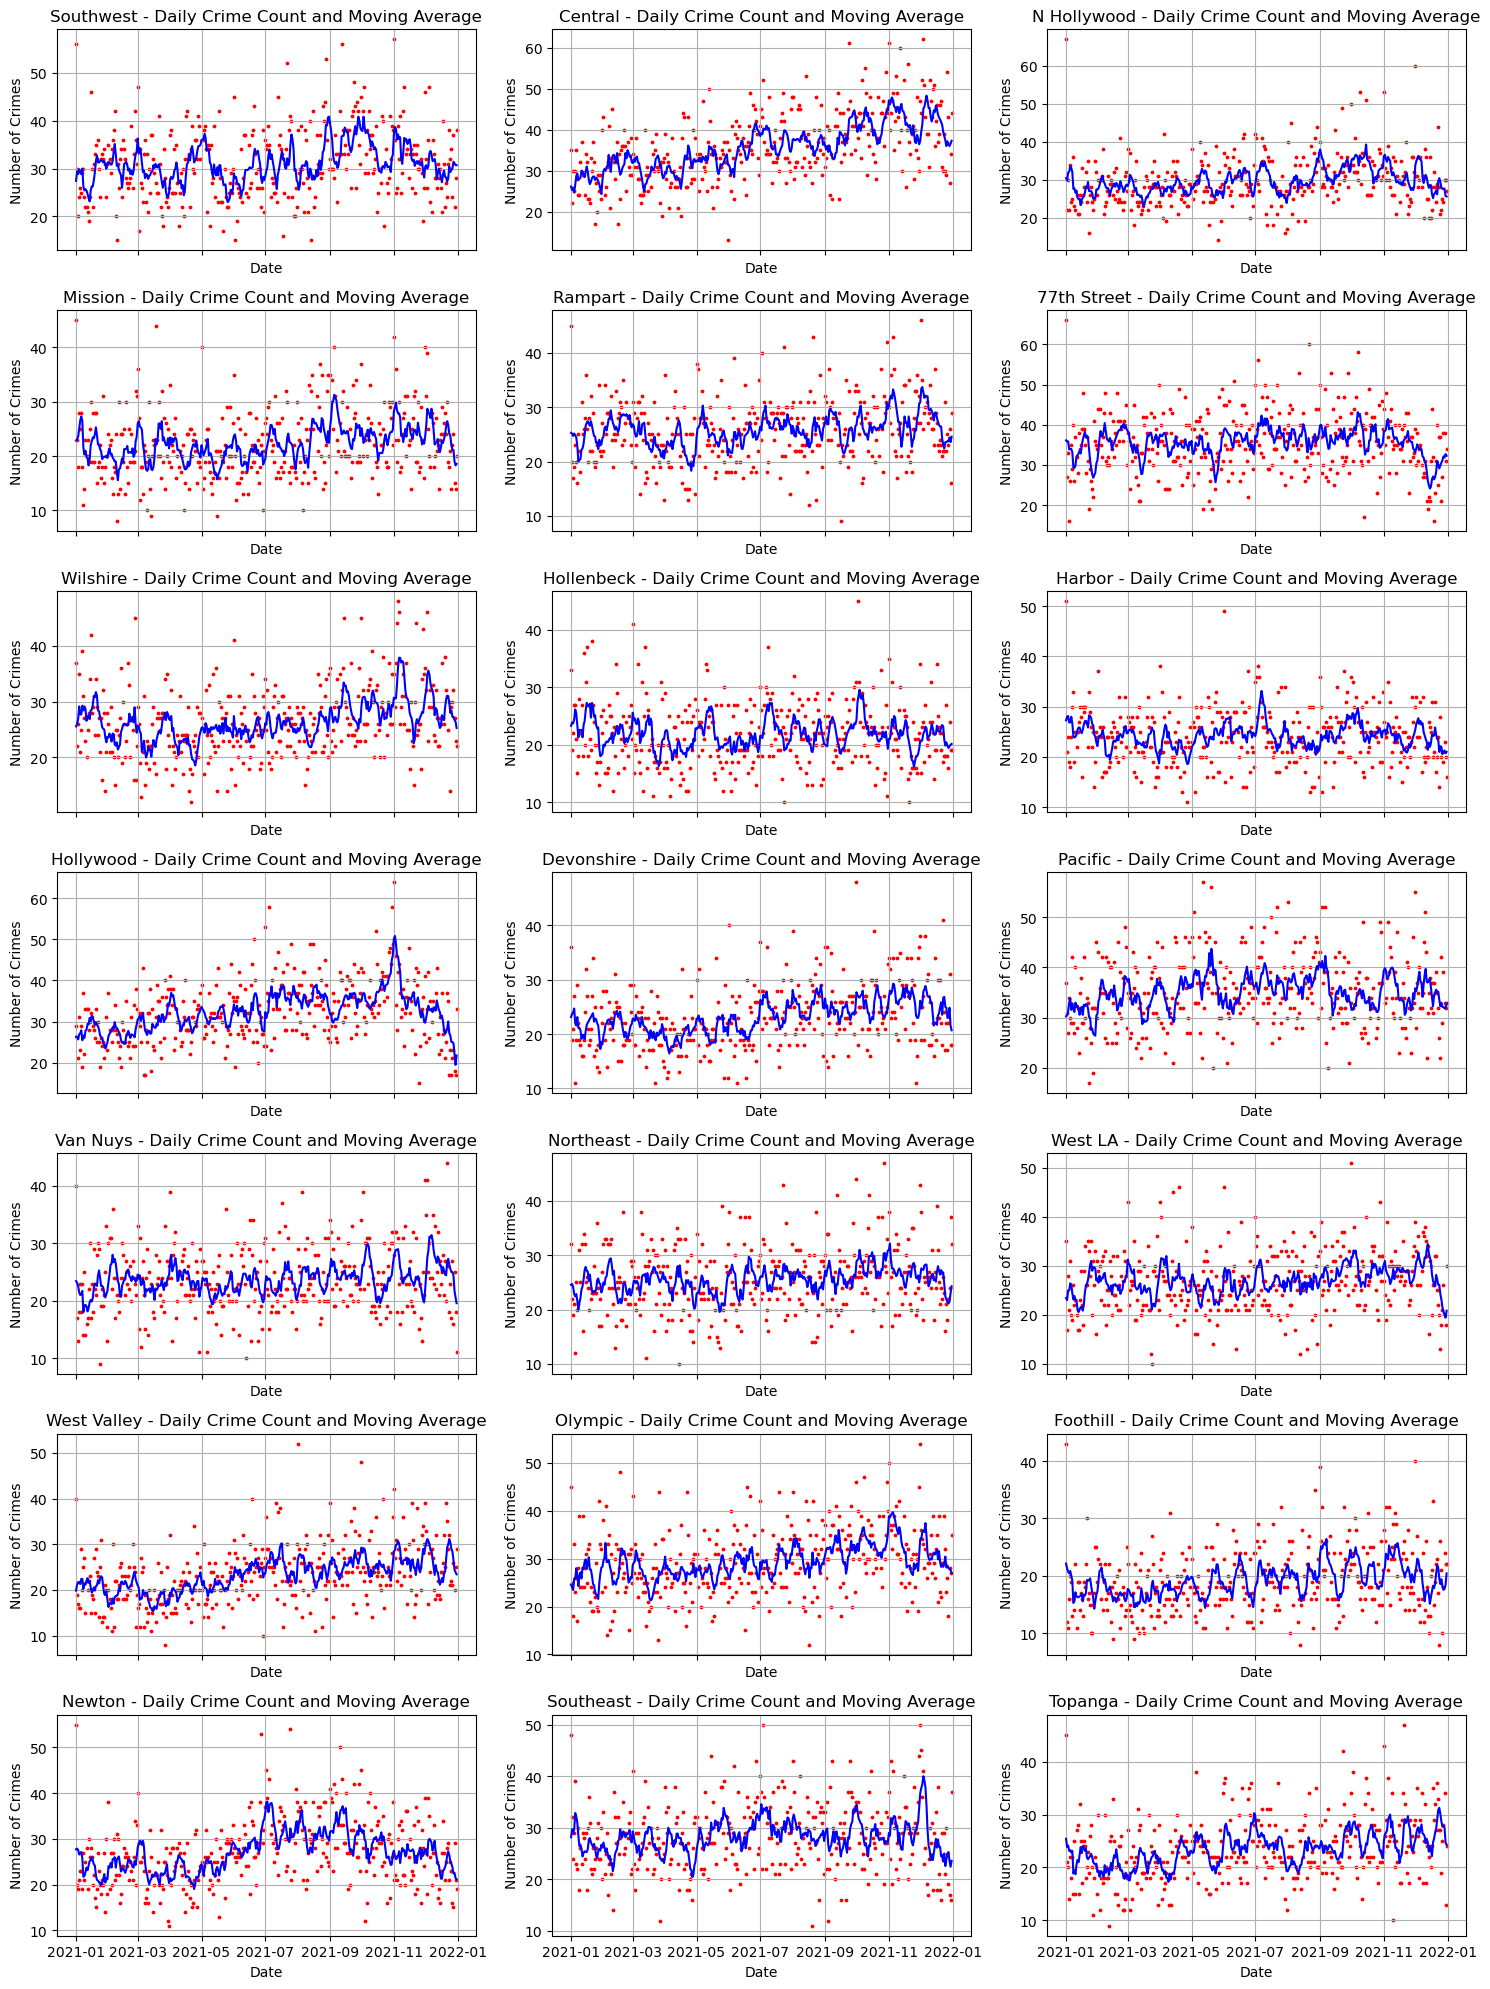

Year 2022


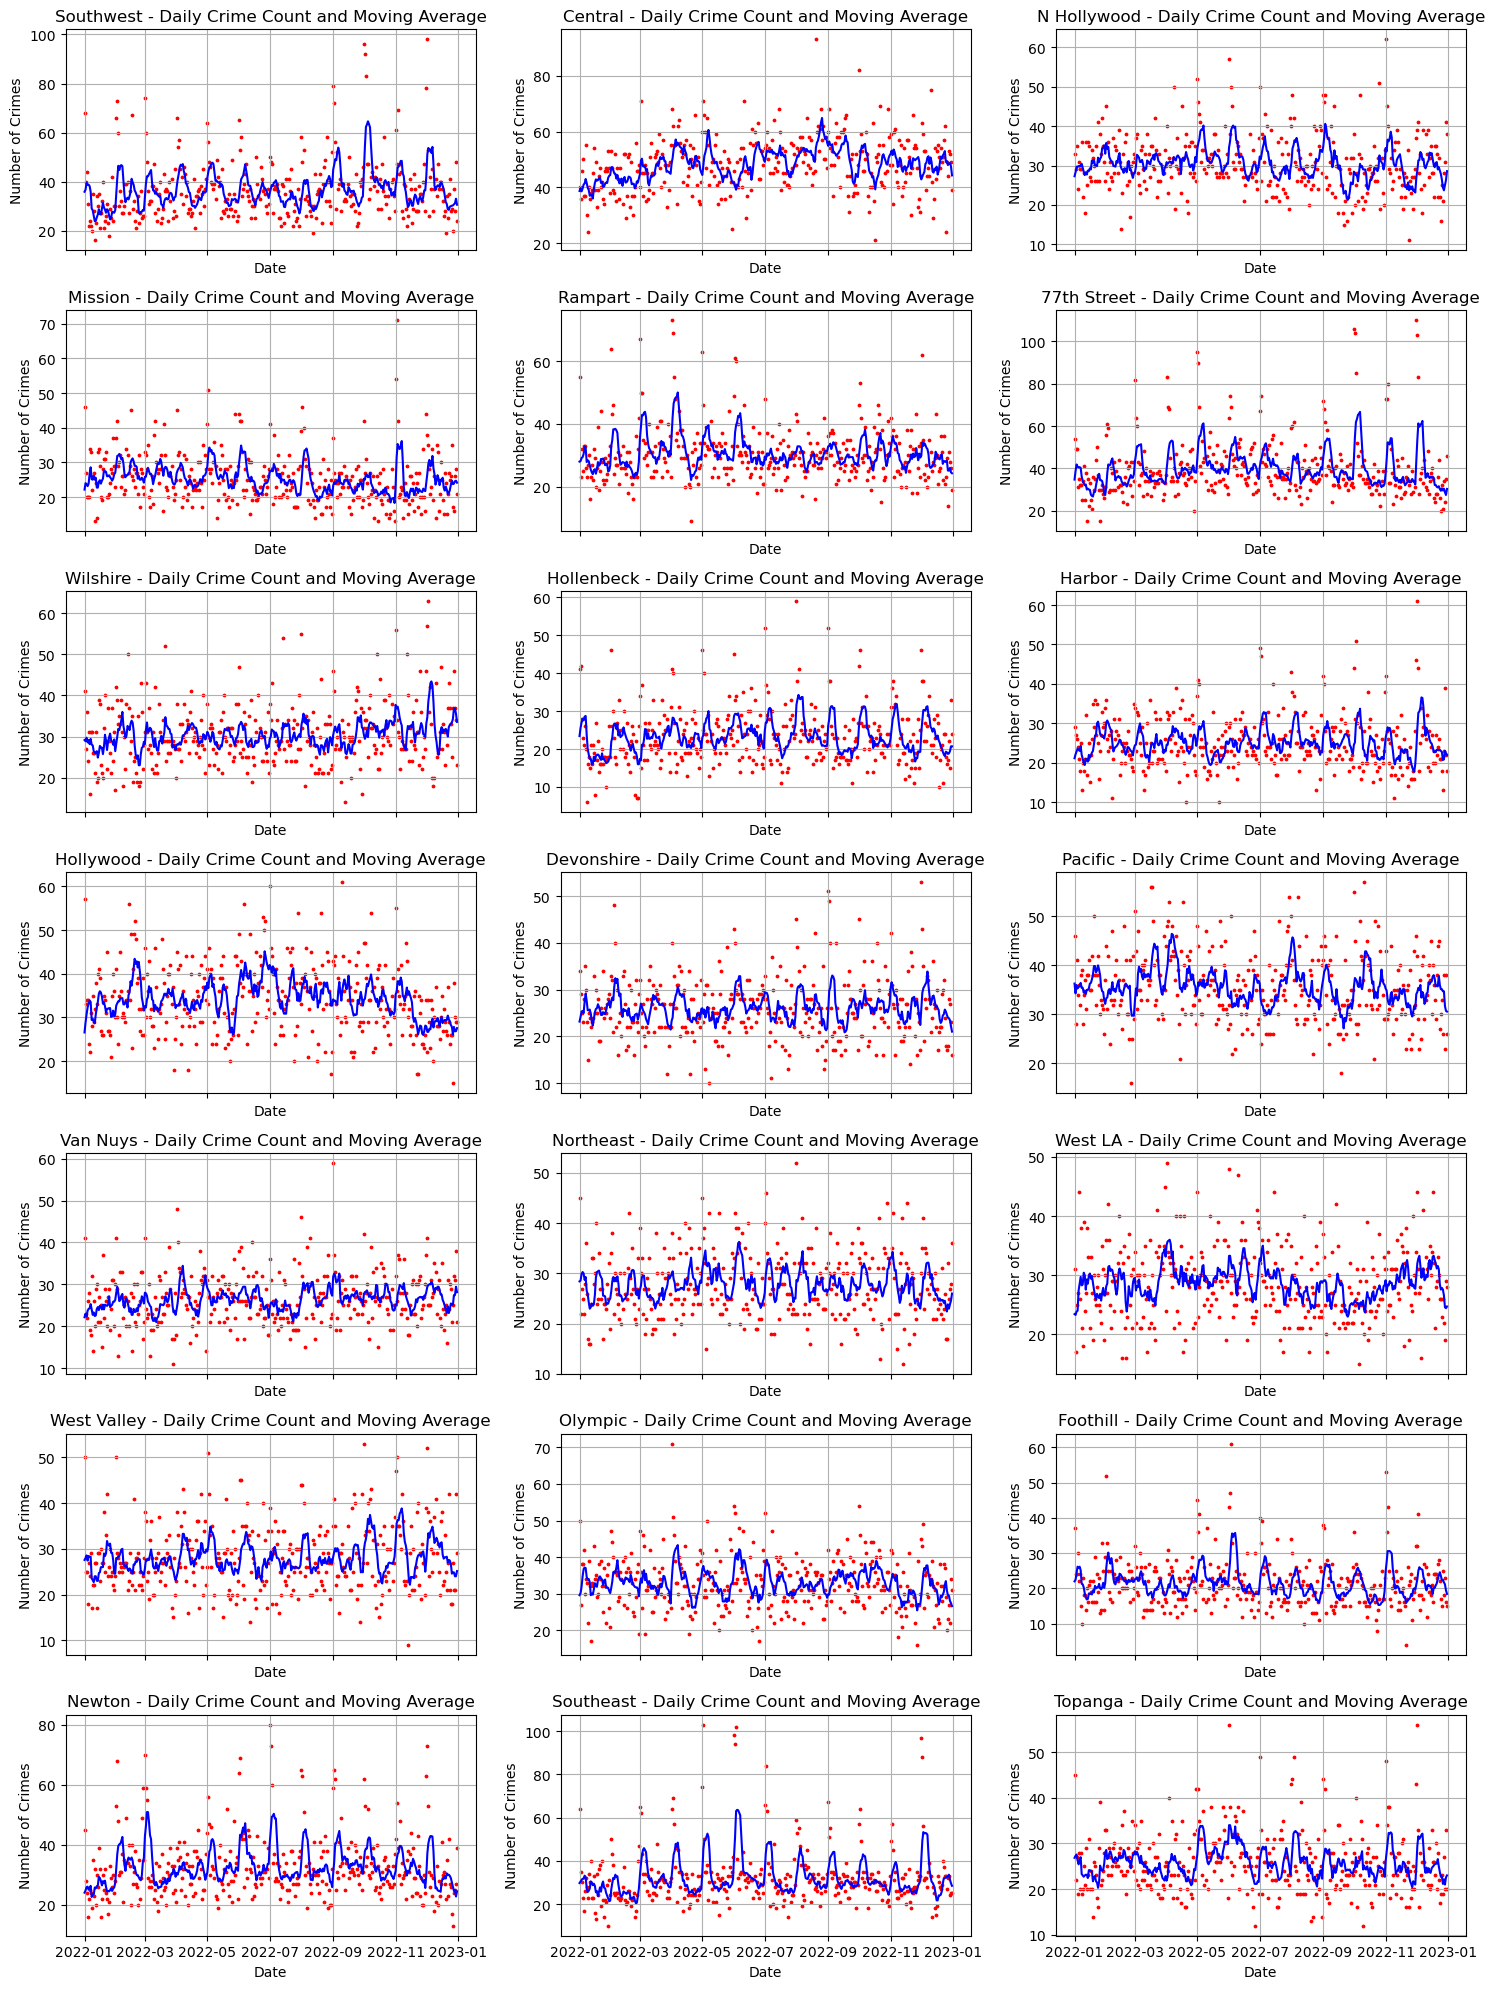

Year 2023


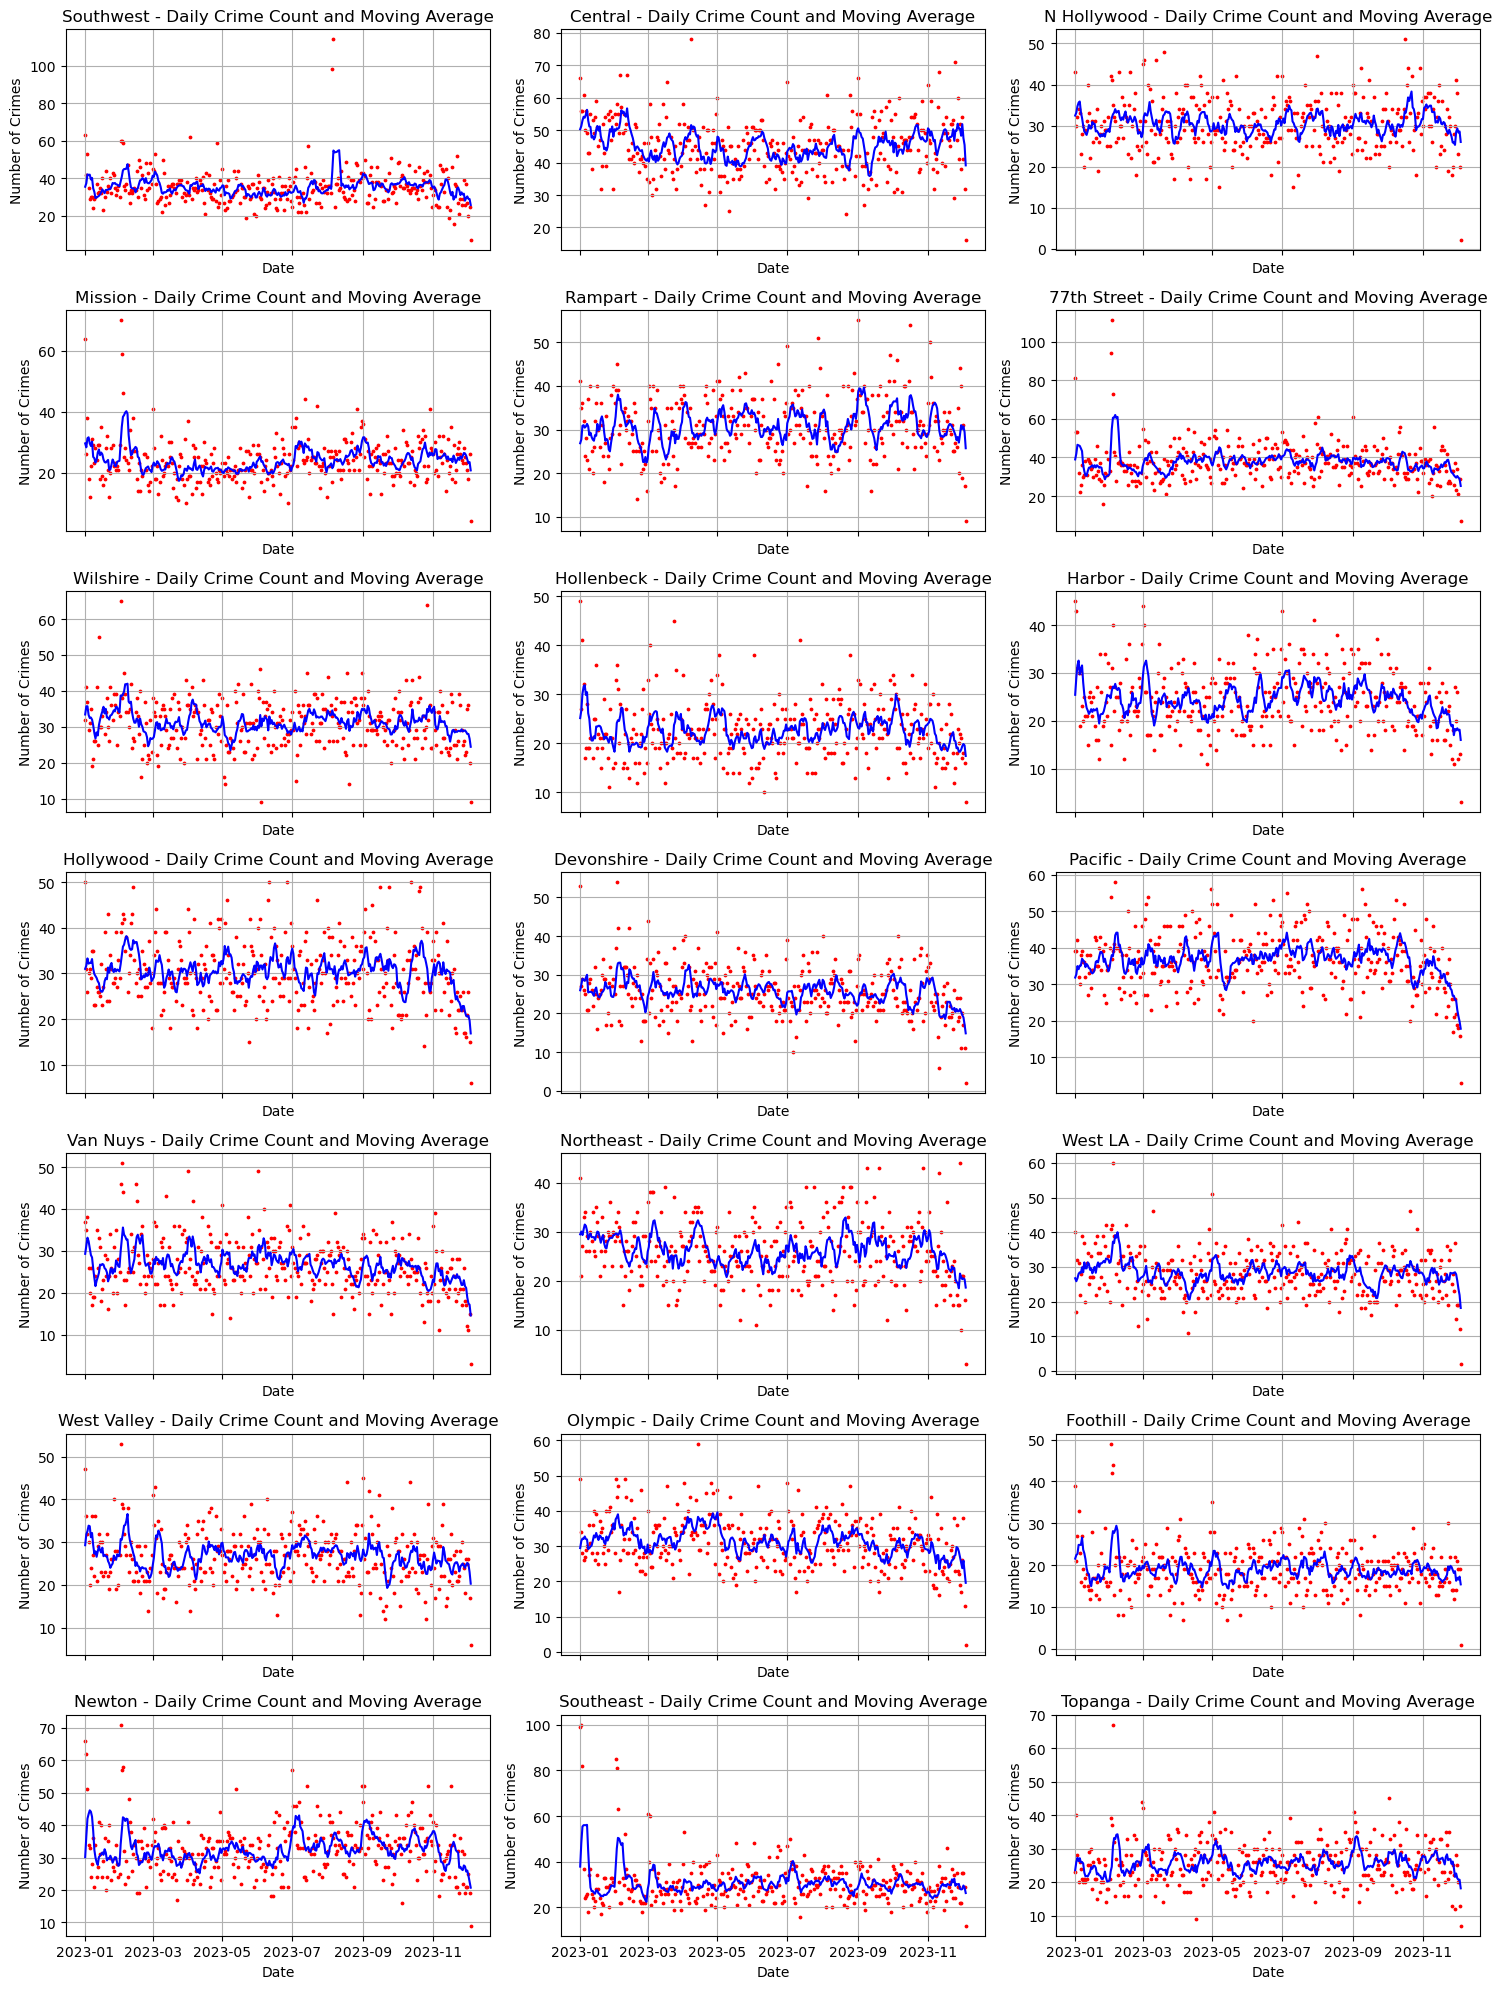

In [30]:
def filterByAreaNames(df, area_names, year):
    fig, axes = plt.subplots(7, 3, figsize=(15, 20), sharex=True)

    for i, areaname in enumerate(area_names):
        # Filter data for the current area name
        area_df = df[df['AREA NAME'] == areaname]

        # Group by 'Date Rptd' and count the number of crimes for each date
        daily_crime_counts = area_df.groupby('DATE OCC')['DR_NO'].count().reset_index()
        daily_crime_counts.columns = ['DATE OCC', 'Crime Count']

        # Calculate the moving average for the daily crime counts
        daily_crime_counts['Moving_Avg_Crime'] = daily_crime_counts['Crime Count'].rolling(window=7).mean()

        # Extract year from the 'Date Rptd' column
        daily_crime_counts['Year'] = daily_crime_counts['DATE OCC'].dt.year

        year_df=daily_crime_counts[daily_crime_counts['Year'] == year]

        # Plotting line graphs for each year
        row, col = divmod(i, 3)
        ax = axes[row, col]
        # year_df=yearly_dfs[index]
        # for year_df in yearly_dfs:
        ax.plot(year_df['DATE OCC'], year_df['Moving_Avg_Crime'], label=f'{areaname} - Moving Average', color='blue')
        ax.scatter(year_df['DATE OCC'], year_df['Crime Count'], label=f'{areaname} - Daily Crime Count', color='red', marker='o', s=3)

        ax.set_title(f'{areaname} - Daily Crime Count and Moving Average')
        ax.set_xlabel('Date')
        ax.set_ylabel('Number of Crimes')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

Years=[2020,2021,2022,2023]

for i in Years:
    print("Year " + str(i))
    filterByAreaNames(df, df["AREA NAME"].unique(),i)

Clustering

In [31]:
def createClusters(areaName, year):

    crime_data=df
    crime_data=crime_data[crime_data["AREA NAME"] == areaName]
    # crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])
    crime_data = crime_data[crime_data['DATE OCC'].dt.year == year]

    spatial_data = crime_data[['LAT', 'LON']].dropna()
    num_clusters = 5
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    spatial_data['cluster'] = kmeans.fit_predict(spatial_data)
    # Merge cluster information back to the original dataset
    crime_data = pd.merge(crime_data, spatial_data[['LAT', 'LON', 'cluster']], how='left', on=['LAT', 'LON'])

    cluster_centers = kmeans.cluster_centers_
    latitudes=[]
    longitudes=[]
    counts=[]

    for i, centroid in enumerate(cluster_centers):
        latitudes.append(centroid[0])
        longitudes.append(centroid[1])
        counts.append(len(spatial_data[spatial_data["cluster"] == i]))

    data = {'lat': latitudes, 'lon': longitudes, 'count': counts}
    data_df = pd.DataFrame(data)

    
    m = folium.Map(tiles="cartodbpositron", zoom_start=100)
    
    for i, row in data_df.iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=row['count'] / 10,  # Adjusting the size of the bubble
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            tooltip=f"Cluster {i + 1}: {row['count']} rows"
        ).add_to(m)

    m.save('bubble_map.html') 
   
Years=[2020,2021,2022,2023]
clusters=createClusters("Central",2020)


c:\Users\Kalyan Ram\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [67]:
def createClusters(Anomalies, Year, scale):
    # Create a single Folium map for all anomalies
    m = folium.Map(tiles="cartodbpositron", zoom_start=1000)

    # Define a color mapping for anomalies
    anomaly_colors = {
        "Southeast": "red",
        "Central": "blue",
        "Harbor": "green",
        "West Valley": "purple",
        "Newton": "orange",
        "Hollywood": "cyan",
        "Southwest": "pink",
        "Foothill": "magenta",
        "Rampart": "brown",
        "77th Street": "gray",
        "Mission": "lime"
        # Add more as needed
    }

    legend_html = """
        <div style="position: fixed; 
                    bottom: 120px; left: 50px; width: 150px; height: 250px; 
                    border:2px solid grey; z-index:9999; font-size:14px;
                    background-color:white; opacity:0.8; padding:10px;">
        <b>Legend</b><br>
    """

    for areaName, color in anomaly_colors.items():
        legend_html += f'<i style="background:{color}; width:12px; height:12px; display:inline-block;"></i> {areaName}<br>'

    legend_html += "</div>"

    m.get_root().html.add_child(folium.Element(legend_html))


    for anomaly in Anomalies:
        areaName, year, start_month, end_month = anomaly

        crime_data = df
        crime_data = crime_data[crime_data["AREA NAME"] == areaName]

        crime_data = crime_data[crime_data['Year'] == year]

        # Filter by month range within the specified year
        crime_data = crime_data[(crime_data['Month'] >= start_month) & (crime_data['Month'] <= end_month)]

        spatial_data = crime_data[['LAT', 'LON']].dropna()
        num_clusters = 5
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        spatial_data['cluster'] = kmeans.fit_predict(spatial_data)
        # Merge cluster information back to the original dataset
        crime_data = pd.merge(crime_data, spatial_data[['LAT', 'LON', 'cluster']], how='left', on=['LAT', 'LON'])

        cluster_centers = kmeans.cluster_centers_
        latitudes = []
        longitudes = []
        counts = []

        for i, centroid in enumerate(cluster_centers):
            latitudes.append(centroid[0])
            longitudes.append(centroid[1])
            counts.append(len(spatial_data[spatial_data["cluster"] == i]))

        data = {'lat': latitudes, 'lon': longitudes, 'count': counts}
        data_df = pd.DataFrame(data)

        anomaly_color = anomaly_colors.get(areaName, "black")  # Default to black if not found

        for i, row in data_df.iterrows():
            folium.CircleMarker(
                location=[row['lat'], row['lon']],
                radius=row['count']/scale,  # Adjusting the size of the bubble
                color=anomaly_color,
                fill=True,
                fill_color=anomaly_color,
                fill_opacity=0.6,
                tooltip=f"Cluster {i + 1}: {row['count']} rows"
            ).add_to(m)

    # Save the HTML file with a common name
    nam = f"{Year}_all_anomalies.html"
    m.save(nam)



Anomalies in year 2020 and 2021

In [68]:
Anomalies2020=[["Southeast",2020,1,3], ["Central",2020,6,6],["Harbor",2020,7,8],["West Valley",2020,1,2], ["Newton",2020,6,7]]

Anomalies2021 = [["Hollywood",2021,11,11],["Southeast",2021,12,12]]

Anomalies2022 = [["Southwest",2022,9,10],["Foothill",2022,5,6],["Rampart",2022,3,4]]

Anomalies2023 = [["77th Street",2023,2,2],["Southeast",2023,1,2],["Foothill",2023,1,2],["Mission",2023,1,2]]

createClusters(Anomalies2020,"2020",45)
createClusters(Anomalies2021,"2021",20)
createClusters(Anomalies2022,"2022",40)
createClusters(Anomalies2023,"2023",40)

c:\Users\Kalyan Ram\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Kalyan Ram\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Kalyan Ram\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Kalyan Ram\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 